In [6]:
states = [[1,2,3], ['a', 'b', 'c'], [10, 20, 30]]

a_l = []
b_l = []
c_l = []

print(list(zip(*states)))


[(1, 'a', 10), (2, 'b', 20), (3, 'c', 30)]


In [8]:
import numpy as np

data = np.loadtxt("Project_RL/tab_q_val_trajectory.csv", delimiter=",", skiprows=1)
print(data[-3:None])

[[4.31300000e+01 2.20000000e+01 7.29000000e+02 1.30000000e+02
  1.00000000e+00 2.86825466e+01]
 [4.66200000e+01 2.30000000e+01 7.29000000e+02 1.40000000e+02
  5.00000000e-01 2.86825466e+01]
 [4.11500000e+01 2.40000000e+01 7.29000000e+02 1.45000000e+02
  1.00000000e+00 2.86825466e+01]]


In [3]:
f = {k: (k+4)*10 for k in range(1, 13)}
l = {k+12: 170 for k in range(1, 13)}
h = f | l
print(h)

{1: 50, 2: 60, 3: 70, 4: 80, 5: 90, 6: 100, 7: 110, 8: 120, 9: 130, 10: 140, 11: 150, 12: 160, 13: 170, 14: 170, 15: 170, 16: 170, 17: 170, 18: 170, 19: 170, 20: 170, 21: 170, 22: 170, 23: 170, 24: 170}


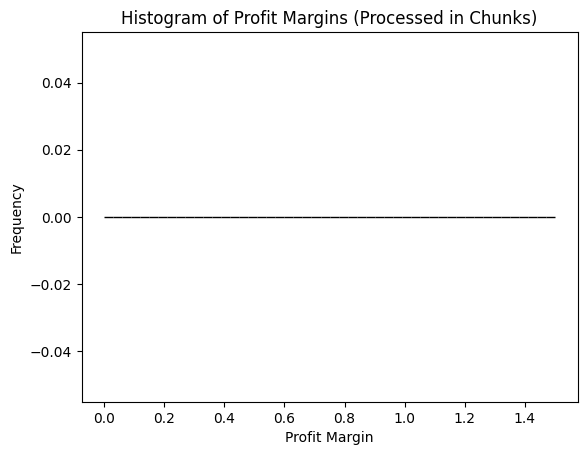

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "Project_RL/tab_q_profit_margins.csv"
column_name = "profit_margin"  # Adjust this based on your file


# Read the file in chunks (assume profit_margin is in the first column)
chunk_size = 10**12  # Adjust based on available memory
chunks = pd.read_csv(file_path, names=[column_name], header=None, chunksize=chunk_size)

df = pd.Series(chunks)
df.to_csv("tab_q_profit_margins_B.csv",index=False)

# Define histogram bins
num_bins = 50
bin_edges = np.linspace(0, 1.5, num_bins + 1)  # Adjust range based on expected values
hist_counts = np.zeros(num_bins)

# Process file chunk by chunk
for chunk in chunks:
    counts, _ = np.histogram(chunk[column_name].dropna(), bins=bin_edges)
    hist_counts += counts  # Accumulate bin counts

# Plot histogram
plt.bar(bin_edges[:-1], hist_counts, width=np.diff(bin_edges), edgecolor="black", align="edge")
plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.title("Histogram of Profit Margins (Processed in Chunks)")
plt.show()



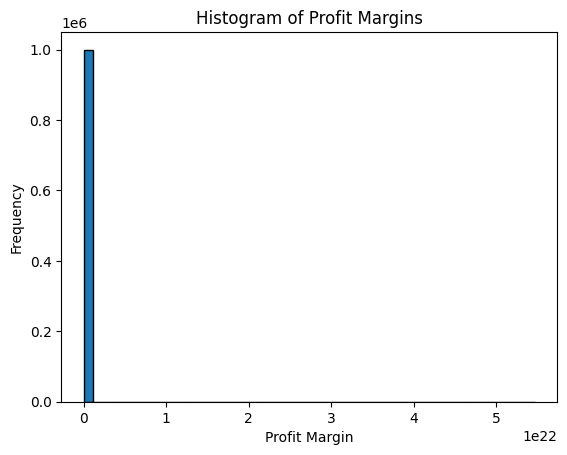

In [3]:
import numpy as np
import matplotlib.pyplot as plt

file_path = "Project_RL/tab_q_profit_margins.csv"

# Memory-map the file (assuming no headers)
data = np.memmap(file_path, dtype="float32", mode="r", shape=(10**6,))  # Adjust shape

# Plot histogram
plt.hist(data, bins=50, edgecolor="black")
plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.title("Histogram of Profit Margins")
plt.show()
